# Utilizando Pandas y Scikit-learn para realizar el preprocesamiento de datos

Visualización de las primeras 5 filas:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeInd

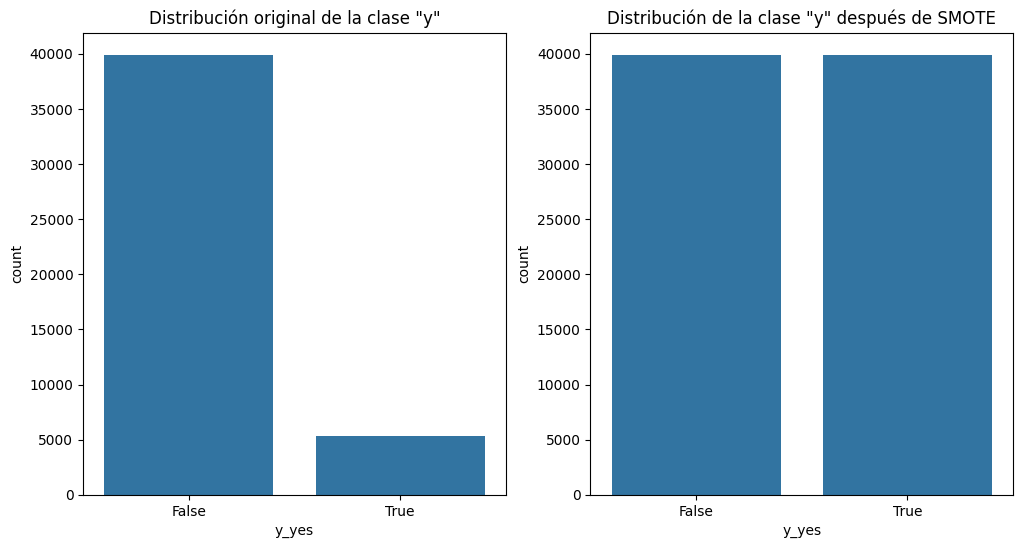

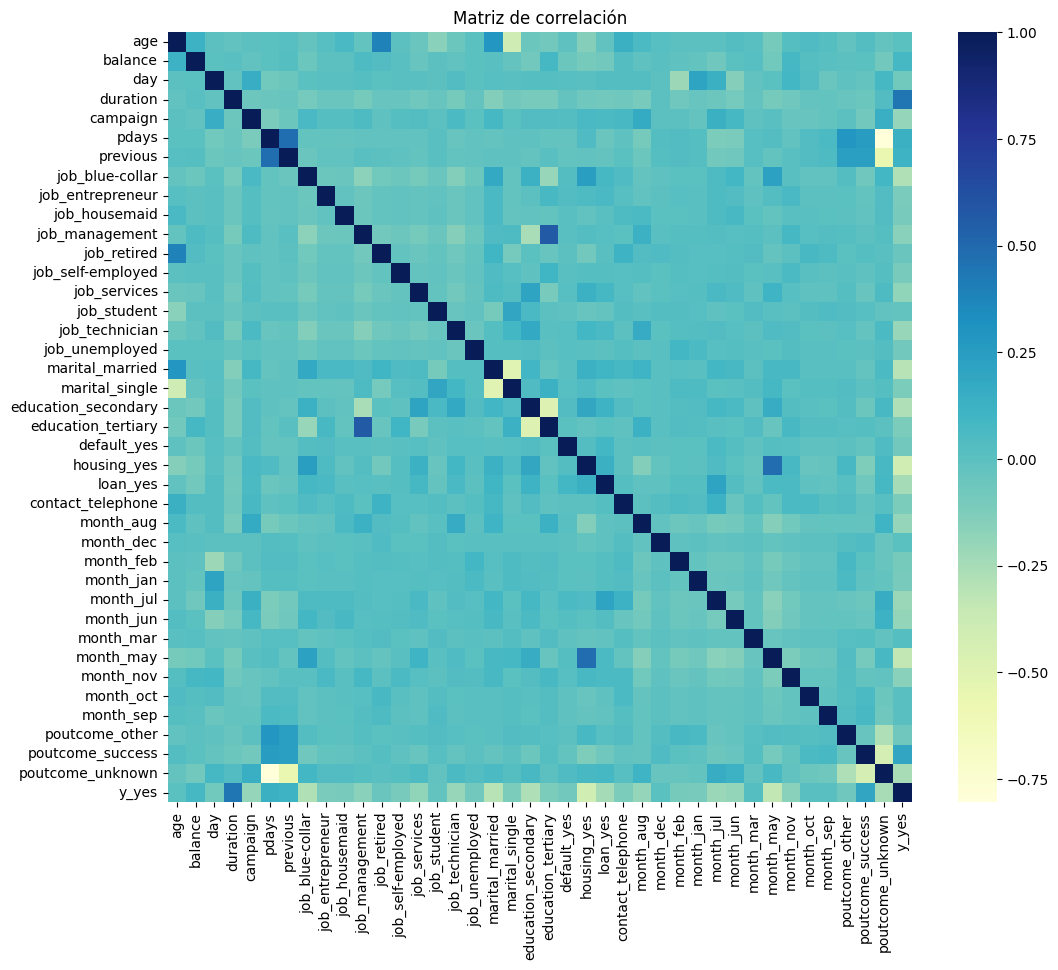


Forma de los conjuntos de datos:
X_train: (63875, 39)
X_test: (15969, 39)
y_train: (63875,)
y_test: (15969,)


In [5]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
data = pd.read_csv("Dataset\\bank_full.csv", sep=";")

# --- 1. Visualización Inicial ---
print("Visualización de las primeras 5 filas:")
print(data.head())

print("\nInformación del dataset:")
print(data.info())

print("\nDistribución de la clase 'y':")
print(data['y'].value_counts())

# --- 2. Manejo de valores faltantes ---
# En este dataset, los valores faltantes están representados por "unknown".
# Se imputarán con la moda para variables categóricas.

categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    mode_value = data[col].mode()[0]
    data[col] = data[col].replace('unknown', mode_value)


# --- 3. Conversión de datos categóricos a numéricos ---
# Usaremos one-hot encoding para las variables categóricas.
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)  # drop_first para evitar multicolinealidad

# --- 4. Balanceo de clases con SMOTE ---
X = data.drop('y_yes', axis=1)
y = data['y_yes']

smote = SMOTE(random_state=42)  # Fijar una semilla para reproducibilidad
X_resampled, y_resampled = smote.fit_resample(X, y)

# Crear un nuevo DataFrame con los datos balanceados
balanced_data = pd.DataFrame(X_resampled, columns=X.columns)
balanced_data['y_yes'] = y_resampled


# --- 5. Visualización post-procesamiento ---
print("\nDistribución de la clase 'y' después de SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Visualizar la distribución de algunas características después de SMOTE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=y, data=data)
plt.title('Distribución original de la clase "y"')

plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled, data=pd.DataFrame({'y_resampled': y_resampled}))
plt.title('Distribución de la clase "y" después de SMOTE')
plt.show()

# Visualización de la correlación entre características (opcional)
plt.figure(figsize=(12,10))
sns.heatmap(balanced_data.corr(), cmap="YlGnBu") #Usar balanced_data
plt.title("Matriz de correlación")
plt.show()

# --- 6. Dividir en conjuntos de entrenamiento y prueba ---
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("\nForma de los conjuntos de datos:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

# Guardar el dataset balanceado
balanced_data.to_csv("Dataset\\bank_full_balanced.csv", index=False)

# Ahora se tiene X_train, X_test, y_train, y_test listos para entrenar un modelo.
# Y también el dataset balanceado guardado en 'bank_full_balanced.csv'